## <center> Importing Libraries

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrejbaranov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrejbaranov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## <center> Reading Data

In [46]:
data = pd.read_csv('data/Flipcart.csv')
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


## <center> Data Info

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


## <center> Null data / Duplicates

In [48]:
data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [49]:
print(f"Duplicated data: {data.duplicated().sum()}")

Duplicated data: 123


In [50]:
data.drop_duplicates(inplace=True)
print(f"Duplicated data after dropping: {data.duplicated().sum()}")

Duplicated data after dropping: 0


## <center> Cleaning reviews

In [51]:
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
    
data["Review"] = data["Review"].apply(clean)

In [52]:
data.sample(5)

,Product_name,Review,Rating
223,"realme C21Y (Cross Black, 64 GB) (4 GB RAM)",realm mobil batteri good camera best rest mobi...,5
432,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,work fridg good enough small famili egg tray u...,5
1766,"realme Narzo 50i (Mint Green, 64 GB) (4 GB RAM)",amaz good price one best mobil batteri good d...,5
471,LG 190 L Direct Cool Single Door 4 Star Refrig...,nice refriger definit recommend u look rang r...,5
1963,Haier 6.5 kg 5 star Ariel Wash Fully Automatic...,recommendedbest valu money fulli automat wash ...,5


## <center> Rating ratio

In [53]:
rating_values = data['Rating'].value_counts().index
rating_counts = data['Rating'].value_counts().values

figure = px.pie(
    values=rating_counts, 
    names=rating_values,
    hole = 0.5
)
figure.show()

## <center> Most Common words

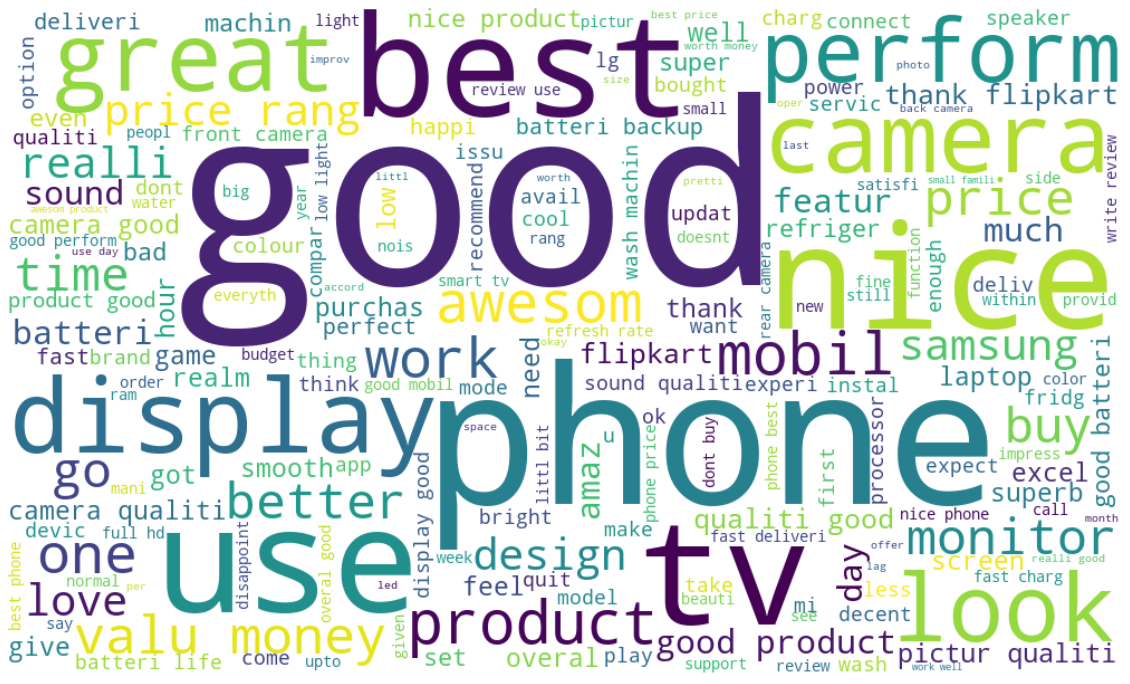

In [54]:
text = " ".join(i for i in data['Review'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color="white",
    width=1000,
    height=600,
    prefer_horizontal=0.9
).generate(text)

plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## <center> Building a model

In [68]:
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]

data.head()

,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000
